In [1]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

In [2]:
IMAGE_FILE_DIR = "../images"

In [3]:
def get_file_list(path:str) -> list:
    return list(os.listdir(path))

In [4]:
image_folders:list = get_file_list(IMAGE_FILE_DIR)
image_files:dict = {}
for im_fol in image_folders:
    image_files[im_fol] = get_file_list(f"{IMAGE_FILE_DIR}/{im_fol}")

In [5]:
image_count = [len(image_files[i]) for i in image_files.keys()]
max_count = max(image_count)

for imf_name in image_folders:
    if len(image_files[imf_name]) < max_count:
        for i in range(abs(len(image_files[imf_name]) - max_count)):
            temp = image_files[imf_name]
            temp.append("NULL")
            image_files[imf_name] = temp

In [6]:
CSV_LOC_PATH = "../datas"

In [7]:
df = pd.DataFrame(image_files)
df.to_csv(f"{CSV_LOC_PATH}/images_list.csv")

In [8]:
# scaler = MinMaxScaler()
images = []
images_label = []
class_name = {}

for imf_name in image_folders:
    for img_name in image_files[imf_name]:
        if not img_name == "NULL":
            img = cv2.imread(f"{IMAGE_FILE_DIR}/{imf_name}/{img_name}", cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, dsize = (256, 256))
            '''scaler.fit(img)
            img_scaled = scaler.transform(img)
            images.append(img_scaled) '''
            images.append(img)
            images_label.append(imf_name)

count = 0
for imf_name in image_folders:
    class_name[imf_name] = count
    count += 1

for i in range(0, len(images_label)):
    images_label[i] = class_name[images_label[i]]

images = np.array(images, dtype = int)
images_label = np.array(images_label, dtype = int)

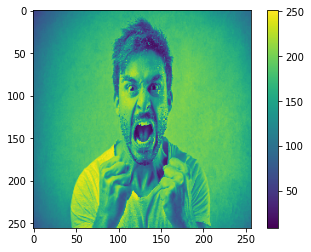

In [9]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
images = images / 255.0

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8388736   
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 8,389,897
Trainable params: 8,389,897
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [15]:
model.fit(images, images_label, epochs = 200)

Epoch 1/200
24/24 [==============================] - 1s 31ms/step - loss: 54.3941 - accuracy: 0.1171
Epoch 2/200
24/24 [==============================] - 1s 31ms/step - loss: 3.7551 - accuracy: 0.1211
Epoch 3/200
24/24 [==============================] - 1s 31ms/step - loss: 2.1933 - accuracy: 0.1289
Epoch 4/200
24/24 [==============================] - 1s 30ms/step - loss: 2.1968 - accuracy: 0.1276
Epoch 5/200
24/24 [==============================] - 1s 40ms/step - loss: 2.1967 - accuracy: 0.1276
Epoch 6/200
24/24 [==============================] - 1s 35ms/step - loss: 2.1967 - accuracy: 0.1276
Epoch 7/200
24/24 [==============================] - 1s 30ms/step - loss: 2.1966 - accuracy: 0.1276
Epoch 8/200
24/24 [==============================] - 1s 30ms/step - loss: 2.1965 - accuracy: 0.1276
Epoch 9/200
24/24 [==============================] - 1s 30ms/step - loss: 2.1964 - accuracy: 0.1276
Epoch 10/200
24/24 [==============================] - 1s 34ms/step - loss: 2.1964 - accuracy: 0.127

In [16]:
test_loss, test_acc = model.evaluate(images, images_label, verbose=2)

print('\nTest accuracy:', test_acc)

24/24 - 0s - loss: 2.1947 - accuracy: 0.1276 - 343ms/epoch - 14ms/step

Test accuracy: 0.12763157486915588
